In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Data Import

In [2]:
training_df = pd.read_csv('data/training_set_data.csv')
unlabeled_df = pd.read_csv('data/unlabeled_data.csv')

# Data Viz

Using the data set (**training_set_data.csv**), create a data visualization that shows the relationship between insurance status, age and income. You may choose to use the age and income variables as provided, or bucket them to create categorical variables. You may create a plot with one or more facets.

In [3]:
## Function for reformatting the age and income range labels
## Could also use the lambda function commented out below

# def range_format(x):
#     x = str(x).replace('(', '').replace(']', '').replace(',', ' -')
#     return x

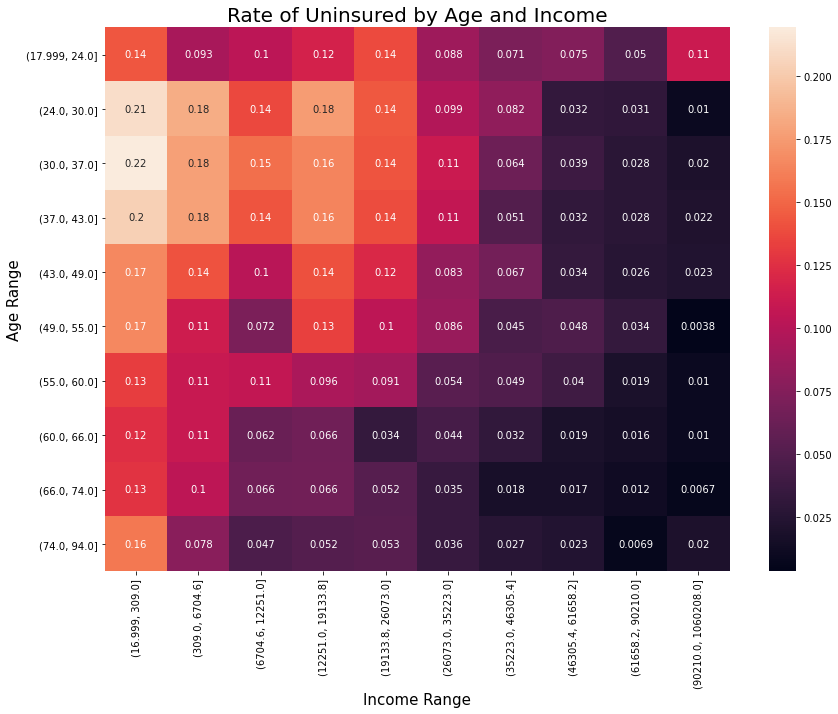

In [4]:
#Reduce columns for less clutter
age_income_df = training_df[['person_id', 'age', 'total_income', 'uninsured']]

#Create 10 equal sized bins for both income and age values
age_income_df['age_bucket'] = pd.qcut(age_income_df['age'], 10)
age_income_df['income_bucket'] = pd.qcut(age_income_df['total_income'], 10)

#Group and pivot the data by the newly created "bucket" values to get it into heatmap format
grouped_age_income_df = pd.DataFrame(data=age_income_df.groupby(['age_bucket', 'income_bucket'])['uninsured'].mean())
grouped_age_income_df.reset_index(inplace=True)
# grouped_age_income_df['age_bucket'] = grouped_age_income_df['age_bucket'].map(lambda x: str(x).replace('(', '').replace(']', '').replace(',', ' -'))
# grouped_age_income_df['income_bucket'] = grouped_age_income_df['income_bucket'].map(lambda x: str(x).replace('(', '').replace(']', '').replace(',', ' -'))
grouped_age_income_df = grouped_age_income_df.pivot("age_bucket", "income_bucket", "uninsured")

#Plot
plt.figure(figsize=(14, 10))
plt.title("Rate of Uninsured by Age and Income", fontsize=20)
sns.heatmap(grouped_age_income_df, annot=True)
plt.ylabel("Age Range", fontsize=15)
plt.xlabel("Income Range", fontsize=15);

# plt.savefig("images/heatmap.png")